## **Exercise:**
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

# **Points to Remember:**
  •There are no null values in the dataset. 

  •There may be some customers with no loan history. 
  
  •The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
  
  •For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
  
  •You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  

# **LOADING THE DATA**

In [1]:
#LOADING THE LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# UPLOADING THE DATASET AND KEEPING A COPY OF IT FOR FURTHER REFERENCE

micro_credit = pd.read_csv("/content/Data file.csv")
micro_credit_1 = micro_credit.copy()
micro_credit_2 = micro_credit.copy()
details = pd.read_excel("/content/Details.xlsx")

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [3]:
# CHECKING THE DETAILS OF THE GIVEN DATASET

pd.set_option('display.max_colwidth', None)  
details = details.fillna("-")
display(details)

Variable  ...                                                                                               Comment
0                  label  ...                                                                                                     -
1                 msisdn  ...                                                                                                     -
2                    aon  ...                                                                                                     -
3           daily_decr30  ...                                                                                                     -
4           daily_decr90  ...                                                                                                     -
5               rental30  ...                                                                            Unsure of given definition
6               rental90  ...                                                                            Unsure of given definition
7      last_rech_date_ma  ...                                                                                                     -
8      last_rech_date_da  ...                                                                                                     -
9       last_rech_amt_ma  ...                                                                                                     -
10         cnt_ma_rech30  ...                                                                                                     -
11          fr_ma_rech30  ...                                                                            Unsure of given definition
12     sumamnt_ma_rech30  ...                                                                                                     -
13  medianamnt_ma_rech30  ...                                                                                                     -
14  medianmarechprebal30  ...                                                                                                     -
15         cnt_ma_rech90  ...                                                                                                     -
16          fr_ma_rech90  ...                                                                            Unsure of given definition
17     sumamnt_ma_rech90  ...                                                                                                     -
18  medianamnt_ma_rech90  ...                                                                                                     -
19  medianmarechprebal90  ...                                                                                                     -
20         cnt_da_rech30  ...                                                                                                     -
21          fr_da_rech30  ...                                                                                                     -
22         cnt_da_rech90  ...                                                                                                     -
23          fr_da_rech90  ...                                                                                                     -
24           cnt_loans30  ...                                                                                                     -
25          amnt_loans30  ...                                                                                                     -
26       maxamnt_loans30  ...  There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
27    medianamnt_loans30  ...                                                                                                     -
28           cnt_loans90  ...                                                                                                     -
29          amnt_loans90  ...                           

In [4]:
# CHECKING THE MICRO CREDIT DATA

pd.set_option('display.max_columns', None)  
micro_credit = micro_credit.set_index("Unnamed: 0")
micro_credit = micro_credit.reset_index(drop=True)
display(micro_credit)

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0         260.13                2.0                0.0              1539   
1        3691.26               20.0                0.0              5787   
2         900.13                3.0                0.0              1539   
3         159.42               41.0                0.0               947   
4        1098.90                4.0                0.0              2309   
...          ...                ...                ...               ...   
209588   1089.19                1.0                0.0              4048   
209589   1728.36                4.0                0.0               773   
209590   8893.20                3.0                0.0              1539   
209591    984.58                2.0               38.0               773   
209592    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   2          21.0             3078.0                1539.0   
1                   1           0.0             5787.0                5787.0   
2                   1           0.0             1539.0                1539.0   
3                   0           0.0                0.0                   0.0   
4                   7           2.0            20029.0                2309.0   
...               ...           ...                ...                   ...   
209588              3           2.0            10404.0                3178.0   
209589              4           1.0             3092.0                 773.0   
209590              5           8.0             9334.0                1539.0   
209591              5           4.0            12154.0                 773.0   
209592              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32   

Below mentioned are those attributes in the datasets which contains either constant values or whose information is of no use to us, so let's remove such columns.

msisdn= mobile number of user	

pcircle =	telecom circle

pdate =	date	

In [5]:
# REMOVING THE COLUMNS

micro_credit.drop(['msisdn', 'pcircle', 'pdate'], axis=1, inplace=True)
pd.set_option('display.max_columns', None)  
display(micro_credit)

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
..

In [6]:
# LET'S GET THE INFORMATION OF THE DATASET

micro_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

So, as per the information specified in the data description, we do not see any null values in our data.

In [7]:
# LET'S GET THE COUNT OF VALUES PRESENT IN EACH ATTRIBUTE

for v in micro_credit.columns:
  print(micro_credit[v].value_counts)
  print("\n")

<bound method IndexOpsMixin.value_counts of 0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0          272.0
1          712.0
2          535.0
3          241.0
4          947.0
           ...  
209588     404.0
209589    1075.0
209590    1013.0
209591    1732.0
209592    1581.0
Name: aon, Length: 209593, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0          3055.050000
1         12122.000000
2          1398.000000
3            21.228000
4           150.619333
              ...     
209588      151.872333
209589       36.936000
209590    11843.111667
209591    12488.228333
209592     4489.362000
Name: daily_decr30, Length: 209593, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0          3065.150000
1         12124.750000
2          1398.000000
3            21.228000
4           150.

This shows us that there are duplicate rows present in our data. We need to drop them. Let's drop the duplicate data(rows) present in our data.

In [8]:
# CHECKING FOR THE DUPLICATE VALUES
micro_credit.duplicated().any()

True

In [9]:
# GETTING THE COUNT OF THE DUPLICATES

micro_credit.duplicated().value_counts()

False    209207
True        386
dtype: int64

In [10]:
micro_credit.shape #before removing the duplicates

(209593, 33)

In [11]:
# LET'S DROP THE DUPLICATES

micro_credit.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [12]:
# RECHECKING THE COUNT OF THE DUPLICATES

micro_credit.duplicated().value_counts()

False    209207
dtype: int64

In [13]:
micro_credit.shape #after removing the duplicates

(209207, 33)

We roughly lost 0.1% data which was of no use to us. Reason being the mobile numbers were repeating and so was the data corresponding to that row, but the only problem was with the date. As the informtion about the date description is very unclear, we can simply assume that the date differed because it was recorded multiple times by different people although the information corresponding to each user remained the same each time the data was recorded on different days.

In [14]:
# CHECKING FOR THE NEGATIVE VALUES

(micro_credit < 0).any().any()

True

In [15]:
# LET'S GET THE COUNT OF THE NEGATIVE VALUES PRESENT IN OUR DATASET

print(micro_credit.where(micro_credit < 0).count())

label                      0
aon                     1539
daily_decr30            1838
daily_decr90            1838
rental30                5628
rental90                5929
last_rech_date_ma       1315
last_rech_date_da         14
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1730
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
dtype: int64


In [16]:
# GETTING THE COUNT OF THE NEGATIVE VALUES

negative_values = []
for n in range(micro_credit.shape[0]):
  for i in micro_credit.iloc[n,:].values:
      if i < 0:
        negative_values.append(n)
        break

In [17]:
# LET'S GET THE VALUE COUNT OF THE INDICES

print(len(negative_values))

12259


We can see that we have almost 5.85% data which has negaive values present in it, keeping them is of no use as it can hamper the skewness as well as it may be responsible for high variance/bias in the data and in order to avoid these we can delete the corresponding rows. And we don't even have to loss a lot of data.

In [18]:
micro_credit = micro_credit.drop(negative_values)
micro_credit.reset_index(drop=True, inplace=True)
micro_credit.shape

(196948, 33)

In [19]:
# LET'S GET THE DESCRIPTIVE STATISTICS OF THE DATASET

micro_credit.describe()

label            aon   daily_decr30   daily_decr90  \
count  196948.000000  196948.000000  196948.000000  196948.000000   
mean        0.883441    8178.500545    5639.919935    6380.534558   
std         0.320895   76024.357941    9401.166374   11144.746261   
min         0.000000       1.000000       0.000000       0.000000   
25%         1.000000     250.000000      47.603917      47.901000   
50%         1.000000     529.000000    1756.260333    1800.000000   
75%         1.000000     980.000000    7670.000000    8305.917500   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  196948.000000  196948.000000      196948.000000      196948.000000   
mean     2830.790908    3666.741547        3840.430503        3774.463940   
std      4365.080155    5855.411861       54526.442821       53818.364584   
min         0.000000       0.000000           0.000000           0.000000   
25%       335.540000     385.680000           1.000000           0.000000   
50%      1193.080000    1481.215000           3.000000           0.000000   
75%      3559.910000    4429.082500           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     196948.000000  196948.000000  196948.000000      196948.000000   
mean        2019.934663       4.088633    3788.568812        7722.403198   
std         2271.304663       4.303217   54010.979445        9714.951872   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1546.000000   
50%         1539.000000       3.000000       2.000000        4640.000000   
75%         2309.000000       6.000000       6.000000       10021.000000   
max        55000.000000     203.000000  999606.368132      275010.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         196948.000000         196948.000000  196948.000000   
mean            1772.312786           3855.066550       6.527215   
std             1967.347616          54051.326205       7.301262   
min                0.000000              0.000000       0.000000   
25%              770.000000             12.500000       2.000000   
50%             1539.000000             35.600000       4.000000   
75%             1924.000000             84.170000       9.000000   
max            55000.000000         999479.419319     336.000000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  196948.000000       196948.00000         196948.000000   
mean        7.674452        12566.10613           1818.178618   
std        12.429600        16703.28084           1972.557263   
min         0.000000            0.00000              0.000000   
25%         0.000000         2486.00000            773.000000   
50%         2.000000         7526.00000           1539.000000   
75%         8.000000        16184.00000           1924.000000   
max        88.000000       418133.00000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         196948.000000  196948.000000  196948.000000  196948.000000   
mean              92.748621     265.789071    3747.483786       0.042940   
std              353.763224    4213.535196   53860.453509       0.406387   
min                0.000000       0.000000       0.000000       0.000000   
25%               16.000000       0.000000       0.000000       0.000000   
50%               37.500000       0.000000       0.000000       0.000000   
75%               80.000000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  196948.000000  196948.000000  196948.000000    19694

In [20]:
# LET'S CHECK THE SKEWNESS OF THE DATASET

micro_credit.skew()

label                   -2.389852
aon                     10.352287
daily_decr30             3.869685
daily_decr90             4.168078
rental30                 4.478224
rental90                 4.380412
last_rech_date_ma       14.627268
last_rech_date_da       14.687452
last_rech_amt_ma         3.833976
cnt_ma_rech30            3.254610
fr_ma_rech30            14.669454
sumamnt_ma_rech30        3.895785
medianamnt_ma_rech30     3.495107
medianmarechprebal30    14.783086
cnt_ma_rech90            3.388640
fr_ma_rech90             2.300742
sumamnt_ma_rech90        4.066385
medianamnt_ma_rech90     3.701427
medianmarechprebal90    45.421276
cnt_da_rech30           17.729993
fr_da_rech30            14.780929
cnt_da_rech90           26.871906
fr_da_rech90            27.757720
cnt_loans30              2.671190
amnt_loans30             2.932300
maxamnt_loans30         17.632931
medianamnt_loans30       4.581069
cnt_loans90             16.637083
amnt_loans90             3.089834
maxamnt_loans9

**Note:-**

cnt_da_rech90 is highly skewed (γ1 = 26.871906)

fr_da_rech90 is highly skewed (γ1 = 27.757720)

medianmarechprebal90 is highly skewed (γ1 = 45.421276)

Let's try to check the outliers present in our data so that we can comment on the skewness of these attributes.

In [21]:
sns.set(style="darkgrid")

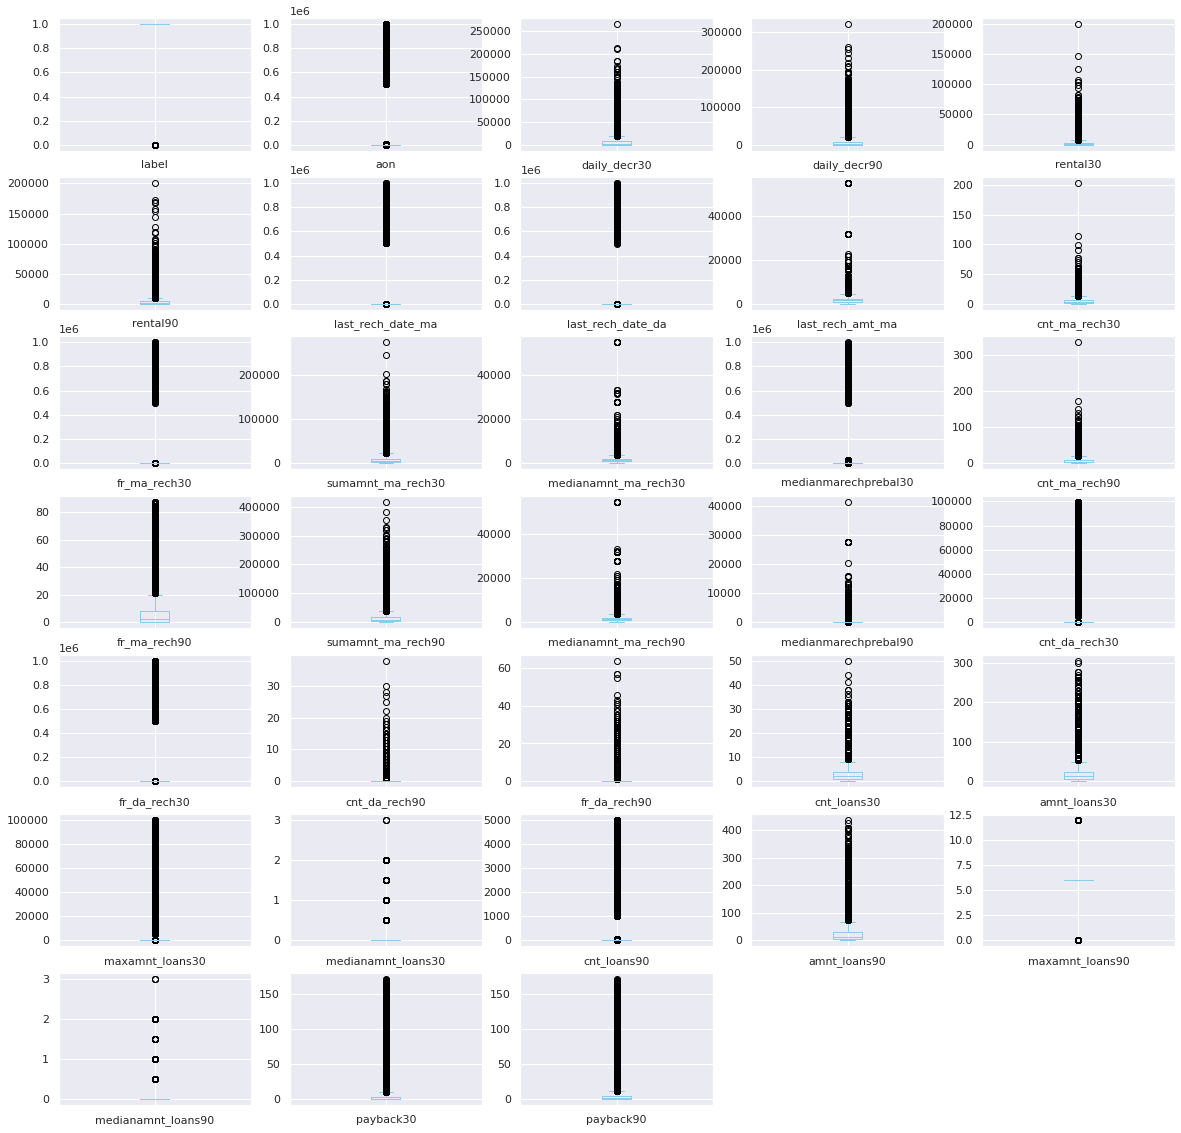

In [22]:
micro_credit.plot(kind='box', subplots=True, layout=(7,5), figsize=(20,20), color='skyblue')
plt.show()

Now, we have our observations from the data and we can use these observations to manipulate the data. 

We will first deal with the outliers so that we can remove any abnormality present in our data which will be very helpful when we use algorithms to make predictions as the linear regression is sensitive to outliers.

In [23]:
!pip install statistics
from statistics import mean, median, mode, stdev

3 Standard Deviations from the Mean: 99.7%

4 Standard Deviations from the Mean: 99.9%

A value that falls outside of 3 & 4 standard deviations is part of the distribution, but it is an unlikely or rare event.

But in our case we have so much skewness present in our data which contains some abnormal values as well, in order to remove those abnormalities we should remove all the values beyond the specified standard deviations.

In [24]:
# CREATING A SET SO THAT WE CAN ONLY EXCTRACT THOSE INDICES WHO HAVE OUTLIERS PRESENT THROUGHOUT THE ROW
outliers_indices = set()

# CALCULATE SUMMARY STATISTICS OF THE DATA
for n in micro_credit.columns:
  if n not in ['label']:
    data_mean, data_std = mean(micro_credit[n]), stdev(micro_credit[n])

    # SETTING THE CUT OFF FOR THE STANDARD DEVIATION
    cut_off = data_std * 4
    lower, upper = data_mean - cut_off, data_mean + cut_off

    #print(micro_credit[n])
    # IDENTIFYING THE OUTLIERS
    outliers = [x for x in micro_credit[n] if x < lower or x > upper]
    #print('Identified outliers: ',outliers)
    print('Identified outliers: ', n, len(outliers))

    # GETTING THE INDEX OF THE OUTLIERS PRESENT FOR REMOVING THEM
    for i,x in enumerate(micro_credit[n]):
      if x < lower or x > upper:
        outliers_indices.add(i)

    # DATA WITH NO OUTLIERS
    no_outliers = [x for x in micro_credit[n] if x >= lower and x <= upper]
    #print('Non-outlier observations: ',no_outliers)
    print('Non-outlier observations: ', n, len(no_outliers))
    print('-------------------------------------------------------------------')

print(len(outliers_indices))
print(outliers_indices)

Identified outliers:  aon 1980
Non-outlier observations:  aon 194968
-------------------------------------------------------------------
Identified outliers:  daily_decr30 1869
Non-outlier observations:  daily_decr30 195079
-------------------------------------------------------------------
Identified outliers:  daily_decr90 1961
Non-outlier observations:  daily_decr90 194987
-------------------------------------------------------------------
Identified outliers:  rental30 1761
Non-outlier observations:  rental30 195187
-------------------------------------------------------------------
Identified outliers:  rental90 2043
Non-outlier observations:  rental90 194905
-------------------------------------------------------------------
Identified outliers:  last_rech_date_ma 1005
Non-outlier observations:  last_rech_date_ma 195943
-------------------------------------------------------------------
Identified outliers:  last_rech_date_da 1000
Non-outlier observations:  last_rech_date_da 1959

In [25]:
# PERCENtAGE OF ROWS WITH OUTLIERS

(31402/209593)*100 

14.982370594437791

But from the above observations we can see that the number of outliers present are very high and we can't afford to loose this much data. So, instead of removing all the outliers from all the columns we should only remove the unrealistic values from those columns whose assumptions can be made based on the domain knowledge and available information from the description. In this way there will be a less loss of the data. 

In [26]:
micro_credit.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [27]:
# FINDING THE OUTLIERS OF THOSE COLUMNS WHOSE ASSUMPTIONS CAN'T BE MADE
# CREATING A SET SO THAT WE CAN ONLY EXCTRACT THOSE INDICES WHO HAVE OUTLIERS PRESENT THROUGHOUT THE ROW
outliers_indices = set()

# CALCULATE SUMMARY STATISTICS OF THE DATA
for n in micro_credit.columns:
  if n not in ['last_rech_date_da','cnt_da_rech30','fr_da_rech30',
               'cnt_da_rech90','fr_da_rech90','medianamnt_loans30',
               'medianamnt_loans90','cnt_ma_rech30', 'fr_ma_rech30',
               'cnt_ma_rech90','fr_ma_rech90','cnt_loans30', 'amnt_loans30',
               'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
               'maxamnt_loans90', 'label']:
    data_mean, data_std = mean(micro_credit[n]), stdev(micro_credit[n])

    # SETTING THE CUT OFF FOR THE STANDARD DEVIATION
    cut_off = data_std * 4
    lower, upper = data_mean - cut_off, data_mean + cut_off

    #print(micro_credit[n])
    # IDENTIFYING THE OUTLIERS
    outliers = [x for x in micro_credit[n] if x < lower or x > upper]
    #print('Identified outliers: ',outliers)
    print('Identified outliers: ', n, len(outliers))

    # GETTING THE INDEX OF THE OUTLIERS PRESENT FOR REMOVING THEM
    for i,x in enumerate(micro_credit[n]):
      if x < lower or x > upper:
        outliers_indices.add(i)
    print('-------------------------------------------------------------------')

# GET THE INDICES
print(len(outliers_indices))
print(outliers_indices)

Identified outliers:  aon 1980
-------------------------------------------------------------------
Identified outliers:  daily_decr30 1869
-------------------------------------------------------------------
Identified outliers:  daily_decr90 1961
-------------------------------------------------------------------
Identified outliers:  rental30 1761
-------------------------------------------------------------------
Identified outliers:  rental90 2043
-------------------------------------------------------------------
Identified outliers:  last_rech_date_ma 1005
-------------------------------------------------------------------
Identified outliers:  last_rech_amt_ma 1301
-------------------------------------------------------------------
Identified outliers:  sumamnt_ma_rech30 1875
-------------------------------------------------------------------
Identified outliers:  medianamnt_ma_rech30 2131
-------------------------------------------------------------------
Identified outliers:  m

cnt_ma_rech30 -> Assuming a person to recharge daily, the maximun number of times any account gets recharged should not exceed by 1recharge/day for a month.(1*30 = 30days)

fr_ma_rech30 -> The description of this feature is similar to above one. So, the assumption should be the same, ie.1recharge/day for a month.(1*30days = 30) 

cnt_ma_rech90 -> Assuming a person to recharge daily, the maximun number of times any account gets recharged should not exceed by 1recharge/day for a 3 months.(1*90days = 90)

fr_ma_rech90 -> The description of this feature is similar to above one. So, the assumption should be the same, ie.1recharge/day for 3 months.(1*90days = 90)

cnt_loans30 -> A person can take a loan for maximun 15 times in a month assuming 1 day to take a loan and repay the other day, it is just not possible to take the loan on the same day the person repays the previous loan. 

amnt_loans30 -> The maximun total amount of loan a user can take in 30 days is 15x12, i.e 180, considering maximum loan amount as 12 per day for 15 days.

maxamnt_loans30 -> There can only be three categories of values present(0, 6, 12).So any value greater than 12 would be unreal.

cnt_loans90 -> A person can take a loan for maximun 15*3=45 times in 3 months assuming 1 day to take a loan and repay the other day, it is just not possible to take the loan on the same day the person repays the previous loan. 


amnt_loans90 -> The maximum total amount of loan a user can take in 90 days is 45x12, i.e 540, considering maximum loan amount as 12 per day for 45 days.

maxamnt_loans90 -> There can only be three categories of values present(0, 6, 12).So any value greater than 12 would be unreal.

In [28]:
# FINDING THE UNREALISTIC VALUES FOR THE COLUMNS WHOSE ASSUMPTIONS CAN BE MADE

assumptions = [30, 30, 90, 90, 15, 180, 12, 45, 540, 12]

list_1 = ['cnt_ma_rech30', 'fr_ma_rech30',
          'cnt_ma_rech90','fr_ma_rech90','cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90']

# CREATING A SET SO THAT WE CAN ONLY EXCTRACT THOSE INDICES WHO HAVE UNREALISTIC VALUES PRESENT THROUGHOUT THE ROW
for a,l in enumerate(list_1):
  unreal_values = []
  for i,value in enumerate(micro_credit[l]):
      if value > assumptions[a] :
        unreal_values.append(value)
        outliers_indices.add(i)
  print('Identified unrealistic values in ', l, ':', len(unreal_values))
  print('---------------------------------------------------------------------')

# GET THE INDICES
print(len(outliers_indices))
print(outliers_indices)

Identified unrealistic values in  cnt_ma_rech30 : 336
---------------------------------------------------------------------
Identified unrealistic values in  fr_ma_rech30 : 998
---------------------------------------------------------------------
Identified unrealistic values in  cnt_ma_rech90 : 25
---------------------------------------------------------------------
Identified unrealistic values in  fr_ma_rech90 : 0
---------------------------------------------------------------------
Identified unrealistic values in  cnt_loans30 : 826
---------------------------------------------------------------------
Identified unrealistic values in  amnt_loans30 : 64
---------------------------------------------------------------------
Identified unrealistic values in  maxamnt_loans30 : 984
---------------------------------------------------------------------
Identified unrealistic values in  cnt_loans90 : 1010
---------------------------------------------------------------------
Identified unrea

In [29]:
(18269/209593)*100 # Now we are left with 8.7% outliers which we can afford to loose.

8.716417055913126

In [30]:
micro_credit.drop(outliers_indices, axis=0, inplace=True)
micro_credit.reset_index(drop=True, inplace=True)
micro_credit

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
178674      1   404.0    151.872333    151.872333   1089.19   1089.19   
178675      1  1075.0     36.936000     36.936000   1728.36   1728.36   
178676      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
178677      1  1732.0  12488.228333  12574.370000    411.83    984.58   
178678      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
178674                1.0                0.0              4048              3   
178675                4.0                0.0               773              4   
178676                3.0                0.0              1539              5   
178677                2.0               38.0               773              5   
178678               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
178674           2.0            10404.0                3178.0   
178675           1.0             3092.0                 773.0   
178676           8.0             9334.0                1539.0   
178677           4.0            12154.0                 773.0   
178678           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
178674                 91.81              3             2              10404   
178675                161.30              6             2               4038   
178676                 51.13             11             5              18592   
178677                164.00              6             4              17941   
178678                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
..

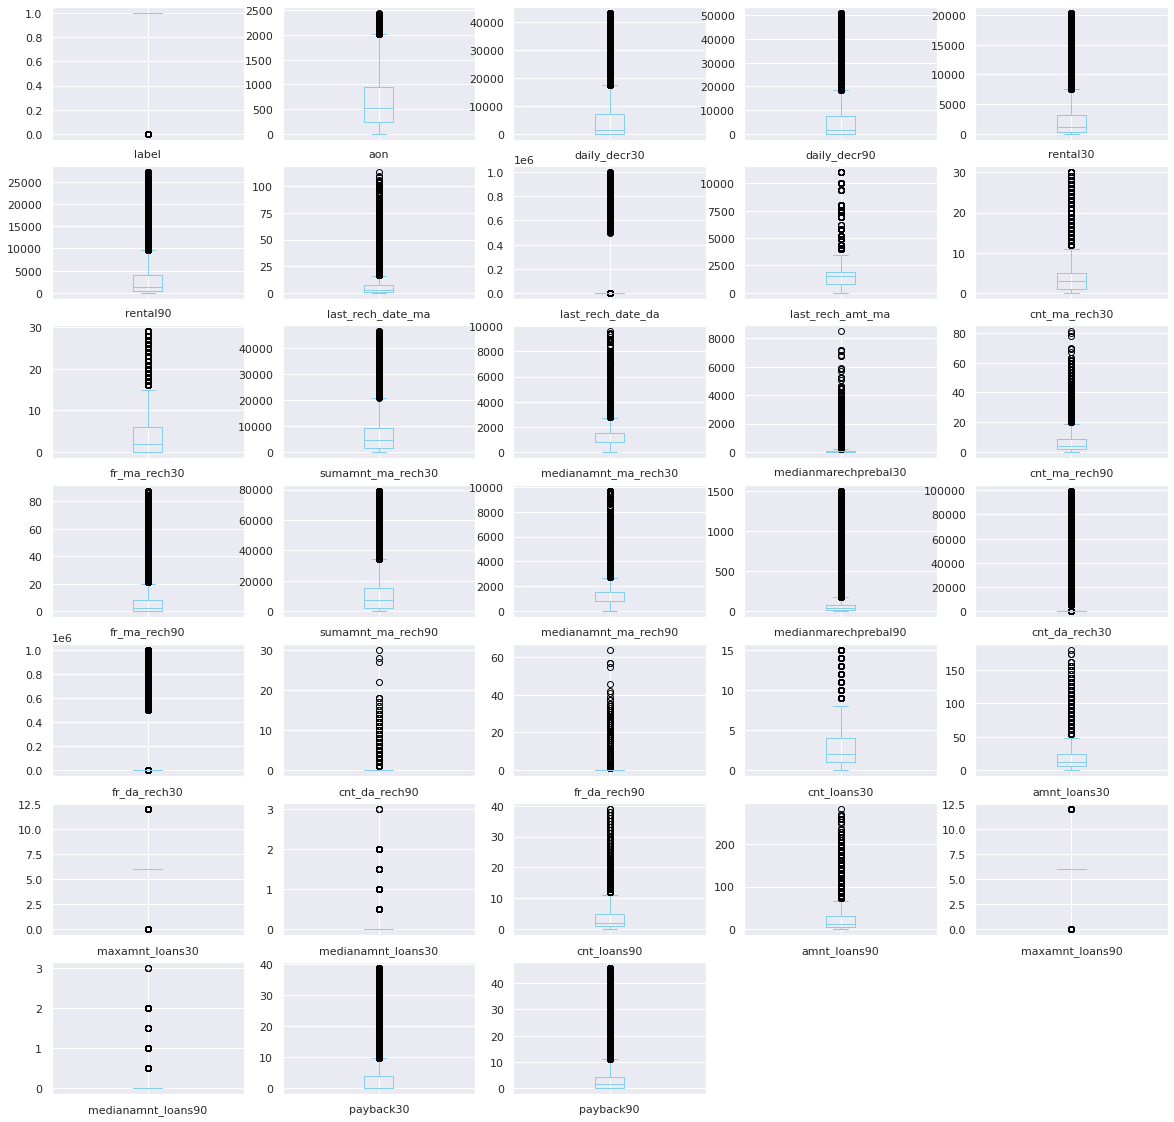

In [31]:
# LET'S CHECK THE OUTLIERS 

micro_credit.plot(kind='box', subplots=True, layout=(7,5), figsize=(20,20), color='skyblue')
plt.show()

We can see that our data is now filtered and cleaned to a great extent and the values appearing above are not outliers but are values with high magnitude whose occurences a very low in our data, although we have removed maximum amount of outliers from our data we may have a few of them left in our data.

In [32]:
# LET'S CHECK THE SKEWNESS OF THE DATASET

micro_credit.skew()

label                   -2.347633
aon                      0.970719
daily_decr30             2.051150
daily_decr90             2.185123
rental30                 2.278801
rental90                 2.344279
last_rech_date_ma        3.619438
last_rech_date_da       14.811510
last_rech_amt_ma         2.190141
cnt_ma_rech30            1.767354
fr_ma_rech30             1.817356
sumamnt_ma_rech30        1.784425
medianamnt_ma_rech30     2.333923
medianmarechprebal30    10.318802
cnt_ma_rech90            2.074050
fr_ma_rech90             2.284554
sumamnt_ma_rech90        1.913175
medianamnt_ma_rech90     2.388868
medianmarechprebal90     4.301089
cnt_da_rech30           17.504488
fr_da_rech30            14.639657
cnt_da_rech90           24.632479
fr_da_rech90            28.858701
cnt_loans30              1.863153
amnt_loans30             2.066050
maxamnt_loans30          1.471140
medianamnt_loans30       4.599244
cnt_loans90              2.333903
amnt_loans90             2.433444
maxamnt_loans9

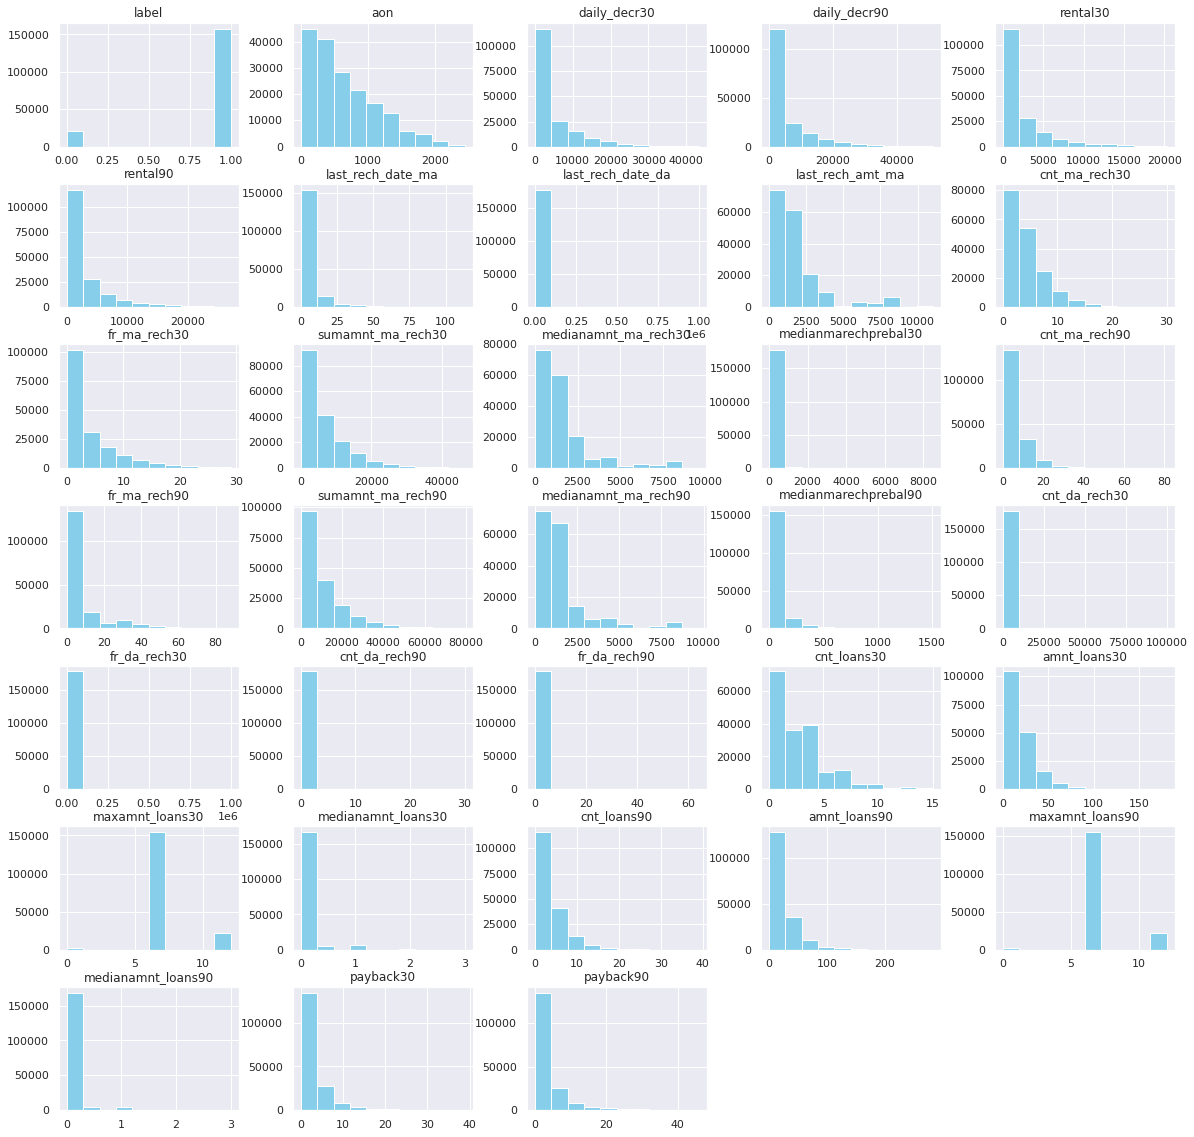

In [33]:
# CHECKING THE DISTRIBUTION

micro_credit.hist(grid=True, layout=(7,5), figsize=(20,20), bins=10, color='skyblue')
plt.show()

We can see that our data is highly skewed especially at the places where there are zeros present on a large scale within that column.

This kind of sitiation is arising biasness in our data which may further hamper in the predictions, so let's deal with the skewed data first.

These are the columns with most biased data.

'last_rech_date_da', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90',  'fr_da_rech90', 'medianamnt_loans30', 'medianamnt_loans90'

In [34]:
# micro_credit.drop(['last_rech_date_da', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'medianamnt_loans30', 'medianamnt_loans90'], axis=1, inplace=True)

In [35]:
for m in micro_credit.columns:
  if m not in ['label','maxamnt_loans30','maxamnt_loans90',
               'last_rech_date_da', 'cnt_da_rech30', 'fr_da_rech30', 
               'cnt_da_rech90', 'fr_da_rech90', 'medianamnt_loans30',
               'medianamnt_loans90'] :
    while micro_credit[m].skew() > 0.5:
      micro_credit[m] = np.log1p(micro_credit[m])
    while micro_credit[m].skew() < -0.5:
      micro_credit[m] = np.square(micro_credit[m])

In [36]:
micro_credit.skew()

label                   -2.347633
aon                     -0.429362
daily_decr30            -0.474639
daily_decr90            -0.451345
rental30                -0.146777
rental90                -0.134513
last_rech_date_ma        0.481354
last_rech_date_da       14.811510
last_rech_amt_ma         0.464326
cnt_ma_rech30           -0.105418
fr_ma_rech30             0.352973
sumamnt_ma_rech30       -0.003879
medianamnt_ma_rech30     0.284030
medianmarechprebal30     0.783628
cnt_ma_rech90           -0.134339
fr_ma_rech90            -0.087138
sumamnt_ma_rech90        0.082202
medianamnt_ma_rech90     0.391365
medianmarechprebal90     0.726284
cnt_da_rech30           17.504488
fr_da_rech30            14.639657
cnt_da_rech90           24.632479
fr_da_rech90            28.858701
cnt_loans30             -0.001296
amnt_loans30            -0.142980
maxamnt_loans30          1.471140
medianamnt_loans30       4.599244
cnt_loans90              0.137767
amnt_loans90             0.145138
maxamnt_loans9

In [37]:
micro_credit.head(10)

label       aon  daily_decr30  daily_decr90   rental30   rental90  \
0      0  5.609472      8.024879      8.028178  29.146510  30.969429   
1      1  6.569481      9.402860      9.403087  67.469698  67.469698   
2      1  6.284134      7.243513      7.243513  46.289647  46.289647   
3      1  5.488938      3.101353      3.101353  25.784006  25.784006   
4      1  6.854355      5.021373      5.021373  49.041652  49.041652   
5      1  6.343880      7.722395      7.724208  34.941681  35.320919   
6      1  6.302619      7.964726      7.967270  33.864728  36.014009   
7      1  6.645091      9.465448      9.787243  46.292969  61.526638   
8      1  7.083388      4.518468      4.518468  59.840310  59.840310   
9      1  6.285998      3.413038      3.413038  41.215498  41.215498   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           1.098612                0.0       2901.849077       1.098612   
1           3.044522                0.0       5633.547471       0.693147   
2           1.386294                0.0       2901.849077       0.693147   
3           3.737670                0.0       2207.324828       0.000000   
4           1.609438                0.0       3598.208434       2.079442   
5           1.098612                0.0       2901.849077       1.609438   
6           2.639057                0.0       5633.547471       0.693147   
7           1.609438               55.0       4229.328638       1.386294   
8           0.693147                0.0       2901.849077       1.609438   
9           2.484907                0.0       1957.479186       0.693147   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0      3.091042        4162.676785           2901.849077   
1      0.000000        5633.547471           5633.547471   
2      0.000000        2901.849077           2901.849077   
3      0.000000           0.000000              0.000000   
4      1.098612        9625.328034           3598.208434   
5      2.397895        5796.027227           2901.849077   
6      0.000000        5633.547471           5633.547471   
7      1.386294        7321.073544           4229.328638   
8      0.693147        5799.478216           2901.849077   
9      0.000000        1957.479186           1957.479186   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0              4.579883       1.098612      1.408800        4162.676785   
1             17.038562       0.693147      0.000000        5633.547471   
2             17.719531       0.693147      0.000000        2901.849077   
3              0.000000       0.693147      0.000000        2207.324828   
4             11.568144       2.197225      0.741276       10261.029014   
5              7.824783       2.197225      0.000000        7712.188861   
6             31.702470       0.693147      0.000000        5633.547471   
7             13.038728       2.302585      0.869742       10695.590788   
8             13.772486       1.609438      0.526589        5799.478216   
9             20.026175       0.693147      0.000000        1957.479186   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0           2901.849077              4.579883            0.0           0.0   
1           5633.547471             17.038562            0.0           0.0   
2           2901.849077             17.719531            0.0           0.0   
3           2207.324828              1.569415            0.0           0.0   
4           4032.203397             12.841608            0.0           0.0   
5           2901.849077             16.332068            0.0           0.0   
6           5633.547471             31.702470            0.0           0.0   
7           4229.328638             13.038728            0.0           0.0   
8           2901.849077             13.772486            0.0           0.0   
9           1957.479186             20.026175            0.0           0.0   

   cnt_da_rech90  fr_da_rec

In [38]:
# LET'S CHECK THE CORRELATION OF THE ATTRIBUTES OF THE DATASET

micro_credit.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000  0.094391  2.628929e-01      0.263820   
aon                   0.094391  1.000000  1.106217e-01      0.110857   
daily_decr30          0.262893  0.110622  1.000000e+00      0.998675   
daily_decr90          0.263820  0.110857  9.986755e-01      1.000000   
rental30              0.121131  0.074714  5.556577e-01      0.556321   
rental90              0.134824  0.082274  6.167863e-01      0.621847   
last_rech_date_ma     0.002251  0.042992  1.095339e-01      0.113485   
last_rech_date_da    -0.000215  0.001219 -1.928866e-03     -0.002167   
last_rech_amt_ma      0.214119  0.084293  3.504084e-01      0.349647   
cnt_ma_rech30         0.333905  0.038350  4.794225e-01      0.475184   
fr_ma_rech30          0.220115  0.063863  2.899659e-01      0.288767   
sumamnt_ma_rech30     0.331833  0.073212  5.384209e-01      0.533737   
medianamnt_ma_rech30  0.234688  0.090503  3.683796e-01      0.365103   
medianmarechprebal30  0.218070  0.048460  2.252103e-01      0.223661   
cnt_ma_rech90         0.351449  0.058605  6.053244e-01      0.608560   
fr_ma_rech90          0.224205  0.066690  2.630154e-01      0.263100   
sumamnt_ma_rech90     0.340662  0.090595  6.512372e-01      0.654828   
medianamnt_ma_rech90  0.208071  0.089273  3.437274e-01      0.343569   
medianmarechprebal90  0.207225  0.045837  1.906459e-01      0.190420   
cnt_da_rech30         0.004161  0.000509  4.853524e-03      0.004789   
fr_da_rech30         -0.001089 -0.001984 -1.763445e-07      0.000022   
cnt_da_rech90         0.003110  0.014058  5.722592e-02      0.056210   
fr_da_rech90         -0.007660  0.008607  3.071203e-02      0.030115   
cnt_loans30           0.225764  0.081168  3.185293e-01      0.312826   
amnt_loans30          0.225922  0.081592  3.627878e-01      0.357862   
maxamnt_loans30       0.066837  0.032154  2.983816e-01      0.299125   
medianamnt_loans30    0.043129 -0.004610  1.253302e-02      0.014223   
cnt_loans90           0.259897  0.125063  4.743798e-01      0.475207   
amnt_loans90          0.259056  0.123775  5.066666e-01      0.507975   
maxamnt_loans90       0.076463  0.037692  3.231619e-01      0.325562   
medianamnt_loans90    0.034281 -0.012891 -2.190604e-02     -0.021727   
payback30             0.229852  0.088883  3.246031e-01      0.322310   
payback90             0.245592  0.120471  4.077739e-01      0.408265   

                      rental30  rental90  last_rech_date_ma  \
label                 0.121131  0.134824           0.002251   
aon                   0.074714  0.082274           0.042992   
daily_decr30          0.555658  0.616786           0.109534   
daily_decr90          0.556321  0.621847           0.113485   
rental30              1.000000  0.972068           0.020530   
rental90              0.972068  1.000000           0.058335   
last_rech_date_ma     0.020530  0.058335           1.000000   
last_rech_date_da     0.001913  0.000734          -0.003453   
last_rech_amt_ma      0.259490  0.269562           0.450910   
cnt_ma_rech30         0.450759  0.440017          -0.087912   
fr_ma_rech30          0.239049  0.241980           0.007325   
sumamnt_ma_rech30     0.481982  0.469684          -0.004268   
medianamnt_ma_rech30  0.298423  0.291168           0.256150   
medianmarechprebal30  0.166190  0.164235           0.105568   
cnt_ma_rech90         0.502290  0.531632           0.048442   
fr_ma_rech90          0.192969  0.207173           0.165043   
sumamnt_ma_rech90     0.520615  0.550692           0.121563   
medianamnt_ma_rech90  0.248438  0.258641           0.443590   
medianmarechprebal90  0.120926  0.127500           0.234789   
cnt_da_rech30         0.001164  0.001316          -0.000508   
fr_da_rech30         -0.001507 -0.001443          -0.000518   
cnt_da_rech90         0.068169  0.066496           0.015978   
fr_da_rech90          0.051877  0.049183           0.007507   
cnt_loans30           0.307202  0.287859          -0.158253   
a

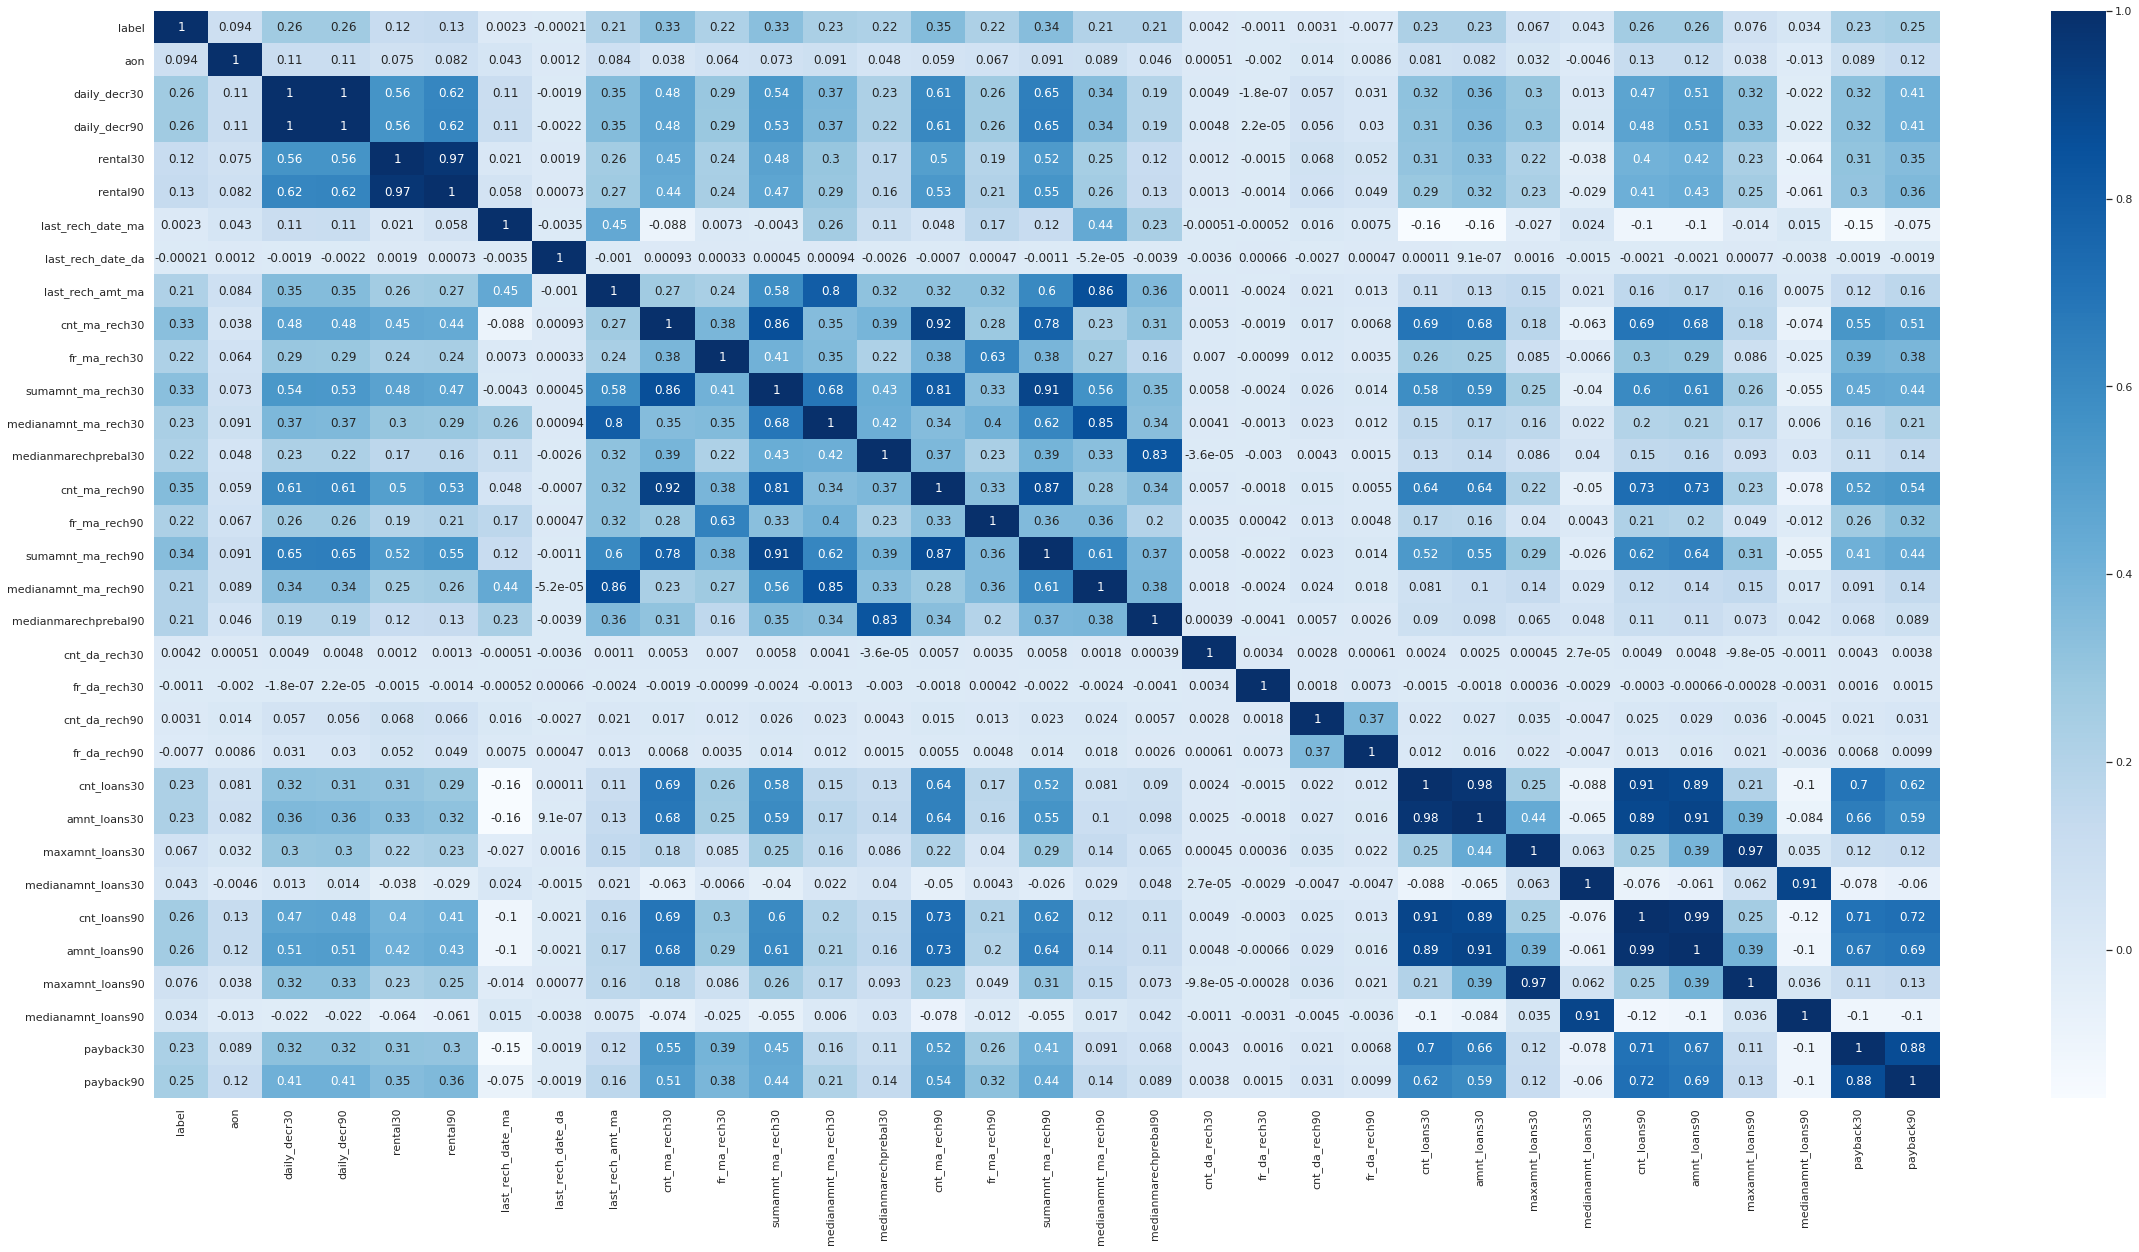

In [39]:
plt.figure(figsize=(40,20))
sns.heatmap(micro_credit.corr(), cmap='Blues', annot=True)
plt.show()

**Note:-**

amnt_loans30 is highly correlated with cnt_loans30 (ρ = 0.98)-Reject any 1

amnt_loans90 is highly correlated with cnt_loans90 (ρ = 0.99)-Reject any 1

daily_decr90 is highly correlated with daily_decr30 (ρ = 1)-Reject any 1

medianamnt_loans90 is highly correlated with medianamnt_loans30 (ρ = 0.91)-Reject any 1

rental90 is highly correlated with rental30 (ρ = 0.97)-Reject any 1

and many more....

We see that the above columns are highly correlated with each other and hence there is no use of keeping columns with multicollinearity in our data.

Just like these there are many more columns where we can see the cases of multicolinearity. Also, we have a large number of features present in our data.
 So, to deal with this case of multicolinearity we can use PCA.

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning. High dimensionality means that the dataset has a large number of features.

# **TRAINING THE MODEL**

Classification type :-

Since we have to  predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. Therefore our problem becomes a classification problem.

Since, our data has different units we will have to bring them on the same scale and hence we'll do standardization of data. Also, for doing PCA it is necessary to have the data within a particular scale.

In [40]:
# SPLITING THE DATA
 
X = micro_credit.drop('label',axis=1)
X.head()

aon  daily_decr30  daily_decr90   rental30   rental90  \
0  5.609472      8.024879      8.028178  29.146510  30.969429   
1  6.569481      9.402860      9.403087  67.469698  67.469698   
2  6.284134      7.243513      7.243513  46.289647  46.289647   
3  5.488938      3.101353      3.101353  25.784006  25.784006   
4  6.854355      5.021373      5.021373  49.041652  49.041652   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           1.098612                0.0       2901.849077       1.098612   
1           3.044522                0.0       5633.547471       0.693147   
2           1.386294                0.0       2901.849077       0.693147   
3           3.737670                0.0       2207.324828       0.000000   
4           1.609438                0.0       3598.208434       2.079442   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0      3.091042        4162.676785           2901.849077   
1      0.000000        5633.547471           5633.547471   
2      0.000000        2901.849077           2901.849077   
3      0.000000           0.000000              0.000000   
4      1.098612        9625.328034           3598.208434   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0              4.579883       1.098612      1.408800        4162.676785   
1             17.038562       0.693147      0.000000        5633.547471   
2             17.719531       0.693147      0.000000        2901.849077   
3              0.000000       0.693147      0.000000        2207.324828   
4             11.568144       2.197225      0.741276       10261.029014   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0           2901.849077              4.579883            0.0           0.0   
1           5633.547471             17.038562            0.0           0.0   
2           2901.849077             17.719531            0.0           0.0   
3           2207.324828              1.569415            0.0           0.0   
4           4032.203397             12.841608            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0     0.741276      2.564949              6.0   
1              0             0     0.526589      2.564949             12.0   
2              0             0     0.526589      1.945910              6.0   
3              0             0     0.741276      2.564949              6.0   
4              0             0     1.124748      3.761200              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0     0.741276      2.564949                6   
1                 0.0     0.526589      2.564949               12   
2                 0.0     0.526589      1.945910                6   
3                 0.0     0.741276      2.564949                6   
4                 0.0     1.124748      3.761200                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0   1.481877   1.481877  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   0.790262   0.790262

In [41]:
# STANDARDIZING THE DATA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()

aon  daily_decr30  daily_decr90  rental30  rental90  \
0 -0.623755      0.579394      0.557803 -0.869542 -0.860569   
1  0.477657      1.059022      1.030406  0.854018  0.685483   
2  0.150280      0.307427      0.288087 -0.098541 -0.211647   
3 -0.762043     -1.134317     -1.135713 -1.020768 -1.080210   
4  0.804490     -0.466024     -0.475737  0.025229 -0.095079   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0          -0.411821          -0.069573          0.085650      -0.287459   
1           1.690481          -0.069573          1.911680      -0.823672   
2          -0.101018          -0.069573          0.085650      -0.823672   
3           2.439336          -0.069573         -0.378611      -1.740335   
4           0.140060          -0.069573          0.551138       1.009653   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0      2.002222          -0.286889              0.223506   
1     -1.076436           0.213102              2.117503   
2     -1.076436          -0.715481              0.223506   
3     -1.076436          -1.701904             -1.788463   
4      0.017775           1.570025              0.706320   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0             -0.878557      -0.591625      1.252478          -0.567102   
1              0.298300      -1.057241     -1.291828          -0.146586   
2              0.362624      -1.057241     -1.291828          -0.927568   
3             -1.311176      -1.057241     -1.291828          -1.126129   
4             -0.218440       0.669967      0.046924           1.176392   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0              0.181110             -0.973176      -0.063793     -0.070247   
1              2.167353              0.301630      -0.063793     -0.070247   
2              0.181110              0.371309      -0.063793     -0.070247   
3             -0.323885             -1.281215      -0.063793     -0.070247   
4              1.003001             -0.127814      -0.063793     -0.070247   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0      -0.108416     -0.048177    -0.017361     -0.101332        -0.296195   
1      -0.108416     -0.048177    -0.919440     -0.101332         2.541848   
2      -0.108416     -0.048177    -0.919440     -0.917643        -0.296195   
3      -0.108416     -0.048177    -0.017361     -0.101332        -0.296195   
4      -0.108416     -0.048177     1.593922      1.476133        -0.296195   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0           -0.246356    -0.231736     -0.297982        -0.325048   
1           -0.246356    -1.038197     -0.297982         2.580076   
2           -0.246356    -1.038197     -1.028804        -0.325048   
3           -0.246356    -0.231736     -0.297982        -0.325048   
4           -0.246356     1.208754      1.114280        -0.325048   

   medianamnt_loans90  payback30  payback90  
0             -0.2273   1.978362   1.799604  
1             -0.2273  -0.946906  -1.044008  
2             -0.2273  -0.946906  -1.044008  
3             -0.2273  -0.946906  -1.044008  
4             -0.2273   0.613093   0.472445

In [42]:
# APPLYING PRINCIPAL COMPONENT ANALYSIS

from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2)
p1 = pd.DataFrame(pca1.fit_transform(X[['daily_decr30', 'daily_decr90', 'rental30', 'rental90']]), columns=['pca_1','pca_2'])
X = pd.concat((X,p1), axis=1)
X.drop(['daily_decr30', 'daily_decr90', 'rental30', 'rental90'], axis=1, inplace=True)

pca2 = PCA(n_components = 5)
p2 = pd.DataFrame(pca2.fit_transform(X[['cnt_loans30', 'amnt_loans30', 'payback30', 'payback90', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans30', 'medianamnt_loans90']]), columns=['pca_3','pca_4','pca_5','pca_6','pca_7'])
X = pd.concat((X,p2), axis=1)
X.drop(['cnt_loans30', 'amnt_loans30', 'payback30', 'payback90', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans30', 'medianamnt_loans90'], axis=1, inplace=True)

pca3 = PCA(n_components = 4)
p3 = pd.DataFrame(pca3.fit_transform(X[['last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90','medianmarechprebal90']]), columns=['pca_8','pca_9','pca_10','pca_11'])
X = pd.concat((X,p3), axis=1)
X.drop(['last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90','medianmarechprebal90'], axis=1, inplace=True)
X.head()

aon  last_rech_date_ma  last_rech_date_da  cnt_da_rech30  \
0 -0.623755          -0.411821          -0.069573      -0.063793   
1  0.477657           1.690481          -0.069573      -0.063793   
2  0.150280          -0.101018          -0.069573      -0.063793   
3 -0.762043           2.439336          -0.069573      -0.063793   
4  0.804490           0.140060          -0.069573      -0.063793   

   fr_da_rech30  cnt_da_rech90  fr_da_rech90     pca_1     pca_2     pca_3  \
0     -0.070247      -0.108416     -0.048177  0.287837 -1.433711 -0.950879   
1     -0.070247      -0.108416     -0.048177 -1.814149 -0.255602  0.672641   
2     -0.070247      -0.108416     -0.048177 -0.144174 -0.446659  2.394025   
3     -0.070247      -0.108416     -0.048177  2.186345  0.072048  1.050440   
4     -0.070247      -0.108416     -0.048177  0.509557  0.436638 -2.510965   

      pca_4     pca_5     pca_6     pca_7     pca_8     pca_9    pca_10  \
0 -0.984707  0.863644  2.156410 -0.579885 -0.181514  0.392089 -2.205872   
1  2.244722 -3.392016  0.368018 -0.179527  0.990487  3.495941  0.377548   
2 -0.245914 -0.534990 -0.162455 -0.099946 -1.414131  1.448694  1.235937   
3 -0.279876 -0.348657 -1.065243 -0.048028 -3.911654  0.614041 -0.372047   
4 -0.708958  0.632034 -1.019497 -0.235194  2.215503 -0.310421 -0.637415   

     pca_11  
0  1.645142  
1 -1.935090  
2 -0.688651  
3 -0.795853  
4 -1.167146

In [43]:
# SPLITTING THE DATA

y = micro_credit['label']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [44]:
(X.shape, y.shape)

((178679, 18), (178679,))

In [45]:
from sklearn.model_selection import train_test_split

# IMPORTING BASE ALGORITHMS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# IMPORTING BAGGING/BOOSTING/OTHER ALGORITHMS
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# IMPORTING ERROR METRICS FOR ANALYSIS OF THE PERFORMANCE 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

# IMPORTING OTHERS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [46]:
# SPLITTING THE DATA AND RNNING A LOOP TO GET THE BEST RANDOM STATE WITH THE BEST PREDICTIVE BASE ALGORITHM

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = None, test_size = 0.30)
model = [LogisticRegression(), KNeighborsClassifier(), GaussianNB(), SVC(), DecisionTreeClassifier()]

for m in model:
  m.fit(X_train, y_train)
  print('Score of', m, 'is:', m.score(X_train, y_train))
  pred = m.predict(X_test)
    
  print('error:')
  print('auc-roc',roc_auc_score(y_test,pred))
  print('AS:',accuracy_score(y_test,pred))
  print('CM:',confusion_matrix(y_test,pred))
  print('CR:',classification_report(y_test,pred))     
  print('\n')
  print('.......................................................................................................')
  print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.8872836298221067
error:
auc-roc 0.5750581821306853
AS: 0.8859786583090814
CM: [[ 1069  5406]
 [  706 46423]]
CR:               precision    recall  f1-score   support

           0       0.60      0.17      0.26      6475
           1       0.90      0.99      0.94     47129

    accuracy                           0.89     53604
   macro avg       0.75      0.58      0.60     53604
weighted avg       0.86      0.89      0.86     53604



.......................................................................................................


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_p

In [47]:
# SPLITTING THE DATA AND RNNING A LOOP TO GET THE BEST RANDOM STATE WITH THE BEST PREDICTIVE BASE ALGORITHM

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = None, test_size = 0.30)
model = [RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(),  XGBClassifier(verbosity=0)]
for m in model:
  m.fit(X_train, y_train)
  print('Score of', m, 'is:', m.score(X_train, y_train))
  pred = m.predict(X_test)
    
  print('error:')
  print('auc-roc',roc_auc_score(y_test,pred))
  print('AS:',accuracy_score(y_test,pred))
  print('CM:',confusion_matrix(y_test,pred))
  print('CR:',classification_report(y_test,pred))     
  print('\n')
  print('.......................................................................................................')
  print('\n')

Score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is: 0.9997041774935039
error:
auc-roc 0.6751202369556735
AS: 0.9079546302514737
CM: [[ 2364  4039]
 [  895 46306]]
CR:               precision    recall  f1-score   support

           0       0.73      0.37      0.49      6403
           1       0.92      0.98      0.95     47201

    accuracy                           0.91     53604
   macro avg       0.82      0.68      0.72     53604
weighted avg       0.90      0.91      0.89     53604

Precision:- Accuracy of positive predictions.

Recall:- Fraction of positives that were correctly identified.

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

The most important thing for our model to predict are the labels with value 0. According to our problem statement if our model predicts label 0 ie.defaulters wrong, it will be a loss for the company as we are more interested in predicting the defaulters more than the non-defaulters.

So, we need to choose those algorithms whose precision values are high for label 0, as higher the precision value, lower will be the loss for the company.

Also, it is very much important for our model to distinguish between the True positive values and True negative values. For this AUC-ROC curve will be very useful. So, for our selection of model we will be focusing on-
  1.Higher precesion value for label 0.
  2.Higher AUC-ROC score.
  3.Higher f1-score

In [48]:
model = [GradientBoostingClassifier()]

max_ac_score = 0
for r_state in range(11,99,11):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = r_state, test_size = 0.30)
        for m in model:
            m.fit(X_train, y_train)
            pred = m.predict(X_test)
            ac_score = roc_auc_score(y_test,pred)
            print('Accuracy_score corresponding to the random state', r_state, 'is', ac_score)
            if ac_score > max_ac_score:
                max_ac_score = ac_score
                final_r_state = r_state
                final_model = m
print()
print()
print('max ac_score corresponding to random state', final_r_state, 'is', max_ac_score, 'and the final model is', final_model)

Accuracy_score corresponding to the random state 11 is 0.6395058285803454
Accuracy_score corresponding to the random state 22 is 0.6439689726076957
Accuracy_score corresponding to the random state 33 is 0.6435929358708915
Accuracy_score corresponding to the random state 44 is 0.6468601096678454
Accuracy_score corresponding to the random state 55 is 0.6429405142220979
Accuracy_score corresponding to the random state 66 is 0.640460624514851
Accuracy_score corresponding to the random state 77 is 0.6462956560438327
Accuracy_score corresponding to the random state 88 is 0.6451094306858882


max ac_score corresponding to random state 44 is 0.6468601096678454 and the final model is GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
               

In [49]:
# EVALUATING THE METRICS BASED ON THE BEST RANDOM STATE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 44 , test_size = 0.30)
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)
print('Score of', gbc, 'is:', gbc.score(X_train, y_train))
print('auc-roc',roc_auc_score(y_test,pred_gbc))
print('AS:',accuracy_score(y_test,pred_gbc))
print('CM:',confusion_matrix(y_test,pred_gbc))
print('CR:',classification_report(y_test,pred_gbc))

Score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is: 0.9066799920047971
auc-roc 0.6468601096678454
AS: 0.9060890978285202
CM: [[ 1960  4438]
 [  596 46610]]
CR:               precision    recall  f1-score   support

           0       0.77      0.31      0.44      6398
           1       0.91      0.99      0.95     47206

    accuracy      

In [50]:
# PERFORMING HYPER-PARAMETER TUNNING USING GRID SEARCH CV

param_grid_gbc = {
    "n_estimators":[5,10,25],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1]
             }
GCV_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid_gbc,cv=3)
GCV_gbc.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [51]:
print('\n Best parameters = ')
print(GCV_gbc.best_params_)


 Best parameters = 
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 25}


In [52]:
# FEEDING THE BEST PARAMETERS

gbc_best = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators=25)
gbc_best.fit(X_train,y_train)
pred_gbc_best = gbc_best.predict(X_test)
print('Score of', gbc_best, 'is:', gbc_best.score(X_train, y_train))
print('auc-roc',roc_auc_score(y_test,pred_gbc_best))
print('AS:',accuracy_score(y_test,pred_gbc_best))
print('CM:',confusion_matrix(y_test,pred_gbc_best))
print('CR:',classification_report(y_test,pred_gbc_best))

Score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is: 0.9068159104537278
auc-roc 0.6322201533210667
AS: 0.9055294381016342
CM: [[ 1748  4650]
 [  414 46792]]
CR:               precision    recall  f1-score   support

           0       0.81      0.27      0.41      6398
           1       0.91      0.99      0.95     47206

    accuracy       

In [53]:
print('Best Scores = ',GCV_gbc.best_score_)

Best Scores =  0.905680593231049


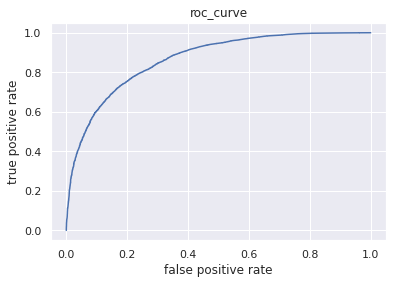

In [54]:
# PLOTTING THE AUC ROC CURVE

pred_prob_gbc=gbc_best.predict_proba(X_test)[:,1]
fpr,tpr,threshholds=roc_curve(y_test,pred_prob_gbc,pos_label=True)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc_curve')
plt.show()

In [55]:
model = [RandomForestClassifier()]

max_ac_score = 0
for r_state in range(11,99,11):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = r_state, test_size = 0.30)
        for m in model:
            m.fit(X_train, y_train)
            pred = m.predict(X_test)
            ac_score = roc_auc_score(y_test,pred)
            print('Accuracy_score corresponding to the random state', r_state, 'is', ac_score)
            if ac_score > max_ac_score:
                max_ac_score = ac_score
                final_r_state = r_state
                final_model = m
print()
print()
print('max ac_score corresponding to random state', final_r_state, 'is', max_ac_score, 'and the final model is', final_model)

Accuracy_score corresponding to the random state 11 is 0.6725404481661588
Accuracy_score corresponding to the random state 22 is 0.6764117217622758
Accuracy_score corresponding to the random state 33 is 0.6806834569671643
Accuracy_score corresponding to the random state 44 is 0.6791809894252506
Accuracy_score corresponding to the random state 55 is 0.6807428517594221
Accuracy_score corresponding to the random state 66 is 0.6756868713197663
Accuracy_score corresponding to the random state 77 is 0.6804064339723137
Accuracy_score corresponding to the random state 88 is 0.6824654501296006


max ac_score corresponding to random state 88 is 0.6824654501296006 and the final model is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_

In [56]:
# EVALUATING THE METRICS BASED ON THE BEST RANDOM STATE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 88, test_size = 0.30)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print('Score of', rf, 'is:', rf.score(X_train, y_train))
print('auc-roc',roc_auc_score(y_test,pred_rf))
print('AS:',accuracy_score(y_test,pred_rf))
print('CM:',confusion_matrix(y_test,pred_rf))
print('CR:',classification_report(y_test,pred_rf))

Score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is: 0.9996162302618429
auc-roc 0.6846135268735665
AS: 0.9106036862920678
CM: [[ 2467  3884]
 [  908 46345]]
CR:               precision    recall  f1-score   support

           0       0.73      0.39      0.51      6351
           1       0.92      0.98      0.95     47253

    accuracy                           0.91     53604
   macro avg       0.83      0.68      0.73     53604
weighted avg       0.90      0.91      0.90     53604



In [57]:
# PERFORMING HYPER-PARAMETER TUNNING USING GRID SEARCH CV

param_grid_rf = {
    'max_features': ['log2', 'sqrt','auto'], 
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 5, 10], 
             }
GCV_rf = GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=3)
GCV_rf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [58]:
print('\n Best parameters = ')
print(GCV_rf.best_params_)


 Best parameters = 
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}


In [59]:
print('Best Scores = ',GCV_rf.best_score_)

Best Scores =  0.9014031633982054


In [60]:
# FEEDING THE BEST PARAMETERS

rf_best = RandomForestClassifier(criterion='gini', max_depth=10, max_features='auto')
rf_best.fit(X_train,y_train)
pred_rf_best = rf_best.predict(X_test)
print('Score of', rf_best, 'is:', rf_best.score(X_train, y_train))
print('auc-roc',roc_auc_score(y_test,pred_rf_best))
print('AS:',accuracy_score(y_test,pred_rf_best))
print('CM:',confusion_matrix(y_test,pred_rf_best))
print('CR:',classification_report(y_test,pred_rf_best))

Score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is: 0.9022426544073556
auc-roc 0.6112716688898474
AS: 0.9014439220953661
CM: [[ 1467  4884]
 [  399 46854]]
CR:               precision    recall  f1-score   support

           0       0.79      0.23      0.36      6351
           1       0.91      0.99      0.95     47253

    accuracy                           0.90     53604
   macro avg       0.85      0.61      0.65     53604
weighted avg       0.89      0.90      0.88     53604



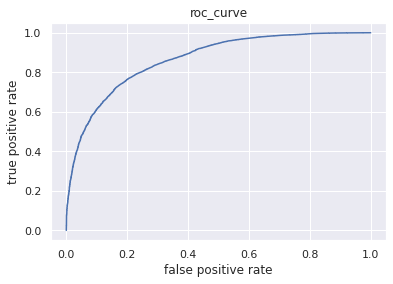

In [61]:
# PLOTTING THE AUC ROC CURVE

pred_prob_rf=rf_best.predict_proba(X_test)[:,1]
fpr,tpr,threshholds=roc_curve(y_test,pred_prob_rf,pos_label=True)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc_curve')
plt.show()

# **OUR FINAL SELECTION IS BASED ON :-**
(Correct predictions of defaulters)
1. Highest precision scored achieved = 0.81
2. Highest AUC-ROC value = 0.6322201533210667
3. Good F1-Score = 0.41
4. Accuracy of the model = 0.90

The final model is - **"Gradient Boosting Classifier"**

In [62]:
# FITTING THE MODEL TO BE USED FOR FURTHER PROCESSES

gbc_best.fit(X,y)
gbc_best.score(X,y)

0.906631445217401

In [64]:
# SAVING THE MODEL

import joblib
joblib.dump(gbc_best,'micro_credit_predict.pkl')

['micro_credit_predict.pkl']

**You are at the end of this ipynb file!**